In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-87.75569144627917 60.916553723603755
-18.32019566047279 99.66721004280089
-62.53487347386708 -88.75391238324066
2.7454362197465656 -123.68854307816088
18.424137454157247 104.65408829140205
-75.98643330141543 -118.9093104142952
67.17435334422635 -123.34658848982302
16.290205404628267 -125.82714074750172
68.35369914200496 -105.89686184826074
-29.57246220857258 -67.04674009897022
-43.43946986995047 45.69610508114579
53.68677592979702 81.37358319089867
-48.25895833282502 -111.27502308337901
10.51787685739798 -147.71497901296152
60.57559802447065 110.00092178591831
-15.160279600837399 74.65419144291295
56.18874918334859 32.82917092239052
42.12904706488467 -129.3453608451927
72.64537533983619 -151.1943341494524
-44.74268828551639 70.68849251982488
-60.44419896657989 140.08955139304186
4.399410672319831 -178.37543883544706
-23.27359155910277 -115.9281706889463
56.72660142266426 -3.1753892190241118
-4.10211391638866 167.4666834406375
48.647764459549535 -36.19196341071054
-35.0061347785703 161

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | ban nahin
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | guerrero negro
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | la rioja
Processing Record 10 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 11 of Set 1 | kamen-na-obi
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | yerbogachen
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | nelidovo
Processing Record 17 of Set 1 | coos bay
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | souillac
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | vaitupu
City 

In [11]:
len(city_data)

561

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,61.66,83,97,5.77,ZA,2022-07-21 00:26:00
1,Punta Arenas,-53.1500,-70.9167,32.11,86,40,23.02,CL,2022-07-21 00:24:07
2,Atuona,-9.8000,-139.0333,77.56,75,3,14.36,PF,2022-07-21 00:24:02
3,Ban Nahin,18.2418,104.2122,77.32,95,99,1.52,LA,2022-07-21 00:26:01
4,Norman Wells,65.2820,-126.8329,78.84,29,75,4.61,CA,2022-07-21 00:26:01
5,Guerrero Negro,27.9769,-114.0611,79.90,48,12,16.62,MX,2022-07-21 00:26:01
6,Yellowknife,62.4560,-114.3525,68.52,40,75,11.50,CA,2022-07-21 00:26:02
7,La Rioja,42.2500,-2.5000,60.58,80,0,3.56,ES,2022-07-21 00:26:02
8,Kamen-Na-Obi,53.7884,81.3423,60.66,83,94,7.29,RU,2022-07-21 00:26:03
9,Rikitea,-23.1203,-134.9692,73.33,76,0,5.01,PF,2022-07-21 00:26:03


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2022-07-21 00:26:00,-33.0153,27.9116,61.66,83,97,5.77
1,Punta Arenas,CL,2022-07-21 00:24:07,-53.1500,-70.9167,32.11,86,40,23.02
2,Atuona,PF,2022-07-21 00:24:02,-9.8000,-139.0333,77.56,75,3,14.36
3,Ban Nahin,LA,2022-07-21 00:26:01,18.2418,104.2122,77.32,95,99,1.52
4,Norman Wells,CA,2022-07-21 00:26:01,65.2820,-126.8329,78.84,29,75,4.61
5,Guerrero Negro,MX,2022-07-21 00:26:01,27.9769,-114.0611,79.90,48,12,16.62
6,Yellowknife,CA,2022-07-21 00:26:02,62.4560,-114.3525,68.52,40,75,11.50
7,La Rioja,ES,2022-07-21 00:26:02,42.2500,-2.5000,60.58,80,0,3.56
8,Kamen-Na-Obi,RU,2022-07-21 00:26:03,53.7884,81.3423,60.66,83,94,7.29
9,Rikitea,PF,2022-07-21 00:26:03,-23.1203,-134.9692,73.33,76,0,5.01


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

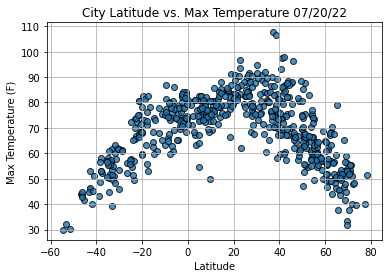

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

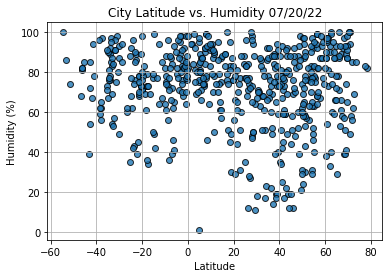

In [19]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

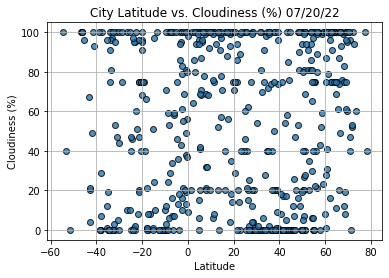

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

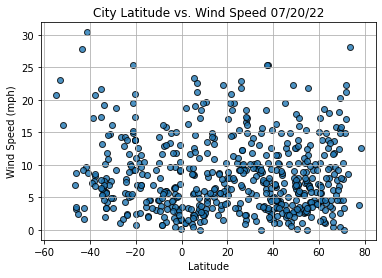

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()